

#  Sepsis Prediction using Machine Learning

## `Business Understanding`
Sepsis is a life-threatening condition that arises when the body's response to infection causes injury to its own tissues and organs. It is a major healthcare problem, causing millions of deaths worldwide each year. Early detection and prompt treatment of sepsis are critical to improving patient outcomes and reducing mortality rates. 


`Problem statement:`
Healthcare providers need an effective tool to predict and diagnose sepsis early to provide timely intervention and improve patient outcomes. Current diagnostic methods often rely on clinical judgment and basic laboratory tests, which can be slow and sometimes inaccurate. There is a need for an advanced predictive model that can analyze large volumes of patient data and identify patterns indicative of sepsis in its early stages.

`Objectives:`
- Early Detection: Develop a machine learning model that can predict the onset of sepsis early using patient data such as vital signs, laboratory results, and demographic information.
- Accuracy: Ensure that the model has high sensitivity and specificity to minimize false positives and false negatives.
Integration: Integrate the model into hospitals' electronic health record (EHR) system for real-time monitoring and alerts.
- Outcome Improvement: Reduce the mortality rate and healthcare costs associated with sepsis by enabling timely and targeted interventions.



### `Hypothesis`
`Null (H₀):` Blood pressure (PR) is not significantly associated with the prediction of sepsis in patients. Changes in blood pressure do not provide useful information for predicting the onset of sepsis.

`Alternative:`(H₁): Blood pressure (PR) is significantly associated with the prediction of sepsis in patients. Changes in blood pressure can provide useful information for predicting the onset of sepsis.



### `Research Questions`
- Which laboratory test results are most strongly associated with the early stages of sepsis?
- How do plasma glucose (PRG) levels vary in patients who develop sepsis compared to those who do not?
- Is there a correlation between body mass index (M11) and the likelihood of developing sepsis?
- How does age interact with Blood Work Result-4 (BD2) in predicting sepsis, and are older patients at a higher risk?
- Do levels of Blood Work Result-2 (SK) show a significant difference between sepsis and non-sepsis patients?

`key Attributes in dataset`
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

`Methodology:`
- Data Collection: Gather historical patient data from kaggle.
- Data Preprocessing: Clean and preprocess data to handle missing values, normalize values, and create features.
- Model Development: Use machine learning algorithms such as logistic regression, random forests, or deep learning to build predictive models.
- Model Evaluation: Validate the model using metrics like accuracy, precision, recall, and the area under the receiver operating characteristic curve (AUC-ROC).
- Deployment: Integrate the model into the hospital's EHR system and set up real-time monitoring and alerting.
- Continuous Improvement: Monitor the model's performance in a real-world setting and update it as needed to maintain accuracy and effectiveness.

`Expected Benefits:`
- Improved Patient Outcomes: Early detection and treatment can significantly reduce the mortality rate associated with sepsis.
- Cost Savings: Reduced length of hospital stays and less intensive care required for early-detected cases.
- Operational Efficiency: Automated alerts and monitoring can help healthcare providers manage their workload more effectively.
- Data-Driven Insights: The model can provide insights into risk factors and trends related to sepsis, informing future healthcare practices and policies.

## `Data Understanding`

In [3]:
### Import necessary packages
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import plotly.express as px
import joblib

# Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

warnings.filterwarnings('ignore')
print("Activated")

Activated


### Load Datasets

In [4]:
df_train = pd.read_csv(r"C:\Users\Orbal\Downloads\archive\Paitients_Files_Train.csv")
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
df_train = df_train.drop(['ID'], axis='columns')
df_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


### Exploratory Data Analysis

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [7]:
df_train.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


#### Univariate Analysis

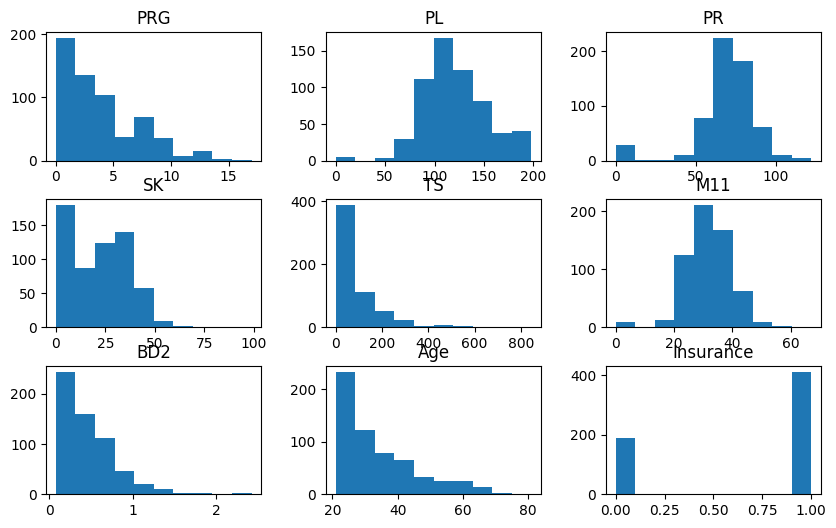

In [9]:
# Visualizing the distribution of the train dataset with a histogram
df_train.hist(figsize=(10, 6), grid=False)
plt.show()

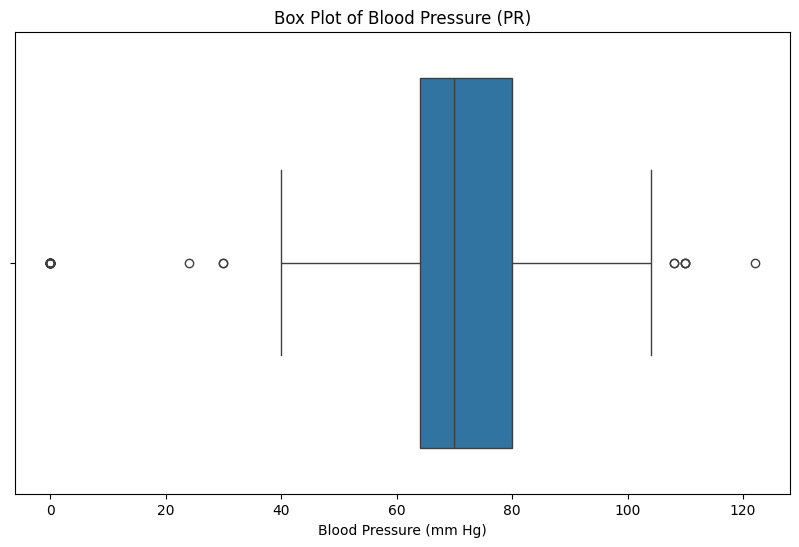

In [10]:
# Creating a boxplot to display the spread of blood pressure column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['PR'])
plt.title('Box Plot of Blood Pressure (PR)')
plt.xlabel('Blood Pressure (mm Hg)')
plt.show()


#### Multivariate Analysis

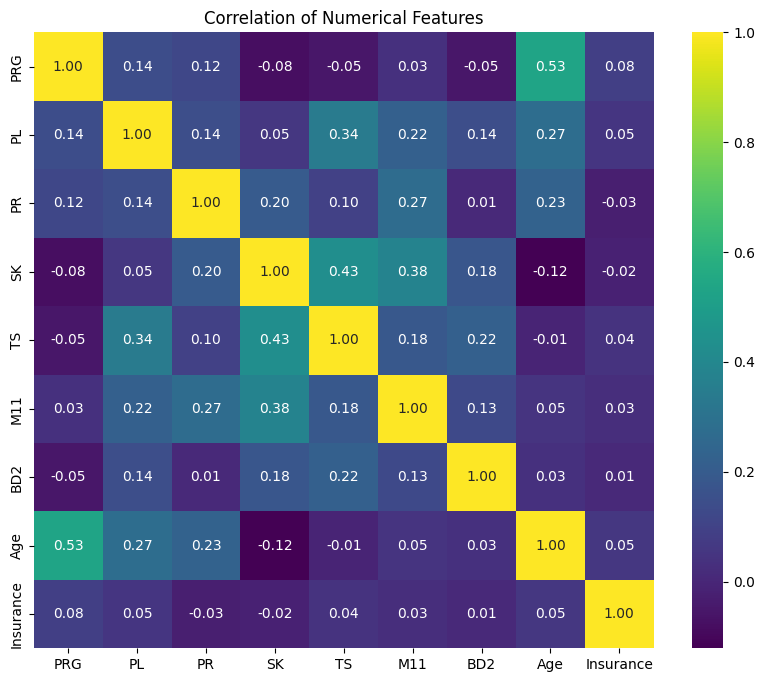

In [11]:
# Plot Heatmap To Visualize The Correlation of Features
correlation_matrix_with_date = df_train.drop(columns=["Sepssis"]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_with_date,annot=True, cmap='viridis',fmt=".2f")
plt.title("Correlation of Numerical Features")
plt.show()

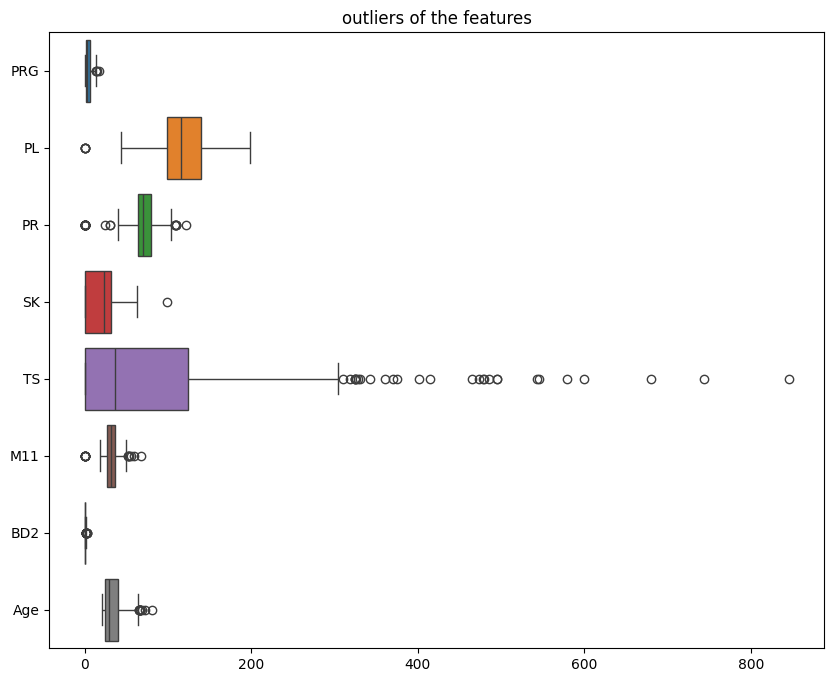

In [12]:
#Check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train.drop(['Insurance','Sepssis'],axis=1),orient='h')
plt.title('outliers of the features')
plt.show()

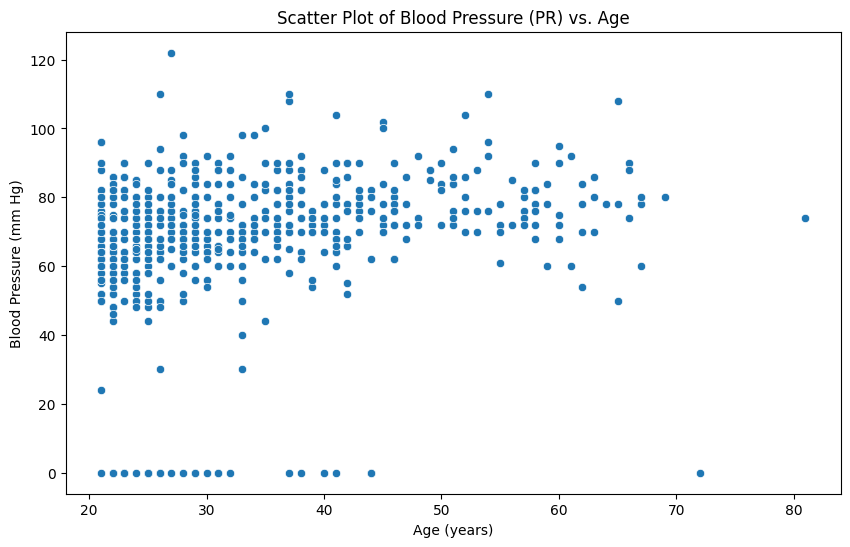

In [13]:
# Scatter plot for Blood Pressure (PR) vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PR', data=df_train)
plt.title('Scatter Plot of Blood Pressure (PR) vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.show()

### Analytical Questions

 ### 1. Which laboratory test results are most strongly associated with the early stages of sepsis?

In [14]:
df_train_converted = df_train.copy()
df_train_converted.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


In [15]:
unique_values = df_train_converted['Sepssis'].unique()
print(unique_values)


['Positive' 'Negative']


In [16]:

df_train_converted['Sepssis'] = df_train_converted['Sepssis'].map({'Positive': 1, 'Negative': 0})


df_train_converted.head()


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


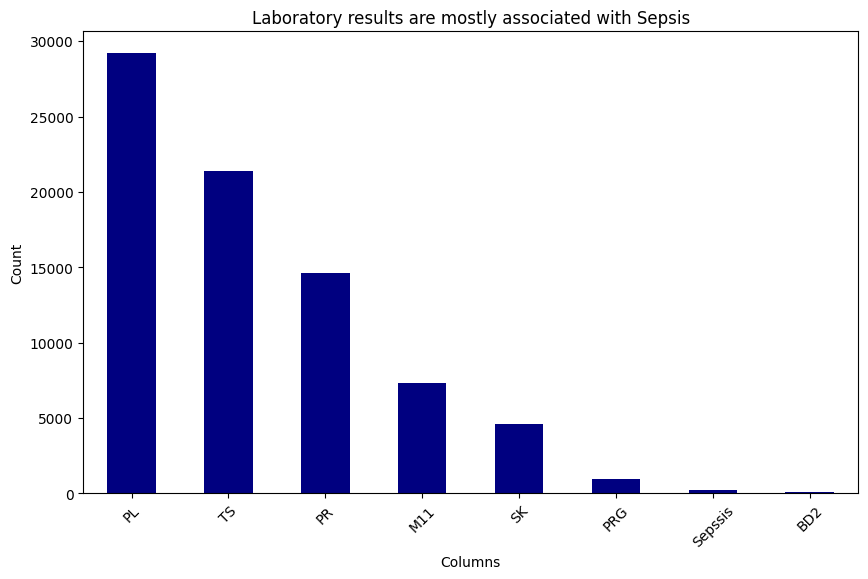

In [17]:

sepsis_data = df_train_converted[df_train_converted['Sepssis'] == 1]
columns_to_exclude = ['Age', 'Insurance']
sepsis_data_filtered = sepsis_data.drop(columns=columns_to_exclude)

# Count occurrences of each remaining column
sepsis_counts = sepsis_data_filtered.sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sepsis_counts.plot(kind='bar', color='navy')
plt.title('Laboratory results are mostly associated with Sepsis')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### 2. How do plasma glucose (PRG) levels vary in patients who develop sepsis compared to those who do not?

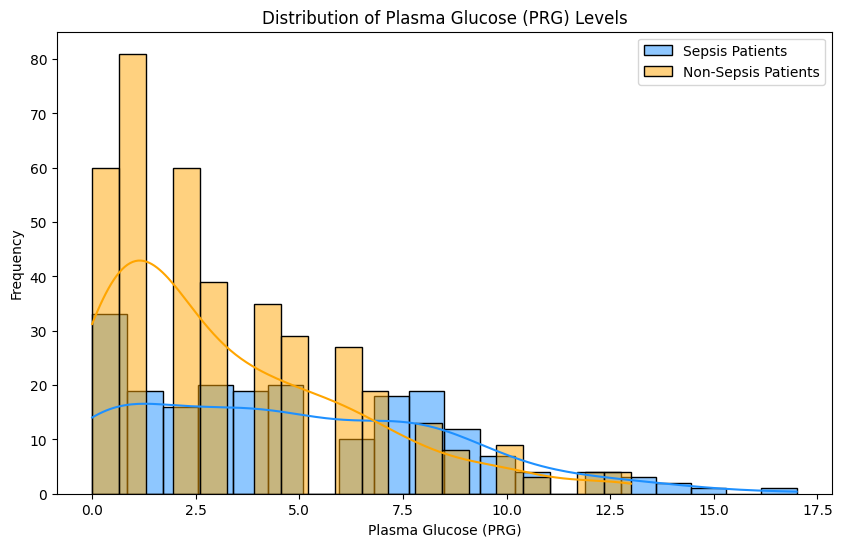

In [18]:
#create a new DataFrame called epsis_patients
sepsis_patients = df_train_converted[df_train_converted['Sepssis'] == 1]

#create a new DataFrame called non_sepsis_patients
non_sepsis_patients = df_train_converted[df_train_converted['Sepssis'] == 0]

plt.figure(figsize=(10, 6))

# Histogram for patients with sepsis
sns.histplot(sepsis_patients['PRG'], bins=20, kde=True, color='dodgerblue', label='Sepsis Patients')

# Histogram for patients without sepsis
sns.histplot(non_sepsis_patients['PRG'], bins=20, kde=True, color='orange', label='Non-Sepsis Patients')

plt.title('Distribution of Plasma Glucose (PRG) Levels')
plt.xlabel('Plasma Glucose (PRG)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### 3. Is there a correlation between body mass index (M11) and the likelihood of developing sepsis?

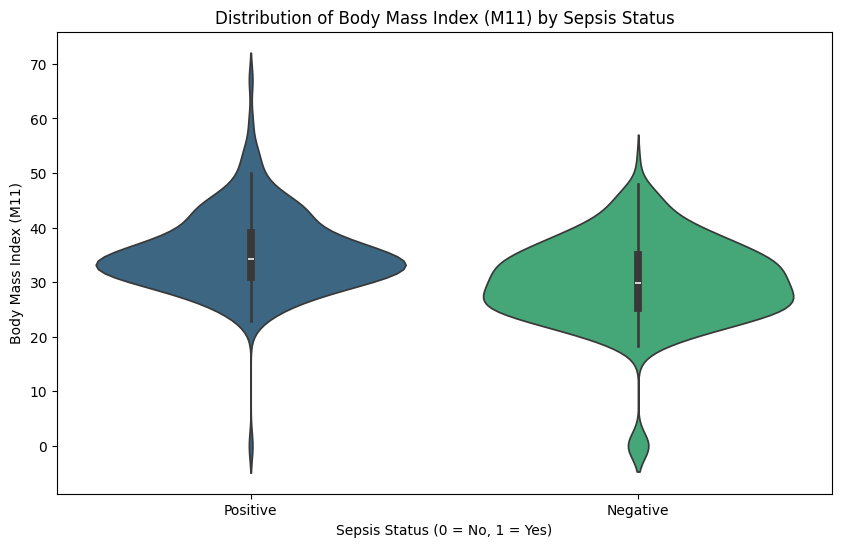

In [19]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sepssis', y='M11', data=df_train, palette='viridis')
plt.title('Distribution of Body Mass Index (M11) by Sepsis Status')
plt.xlabel('Sepsis Status (0 = No, 1 = Yes)')
plt.ylabel('Body Mass Index (M11)')
plt.show()


### 4.How does age interact with Blood Work Result-4 (BD2) in predicting sepsis, and are older patients at a higher risk?

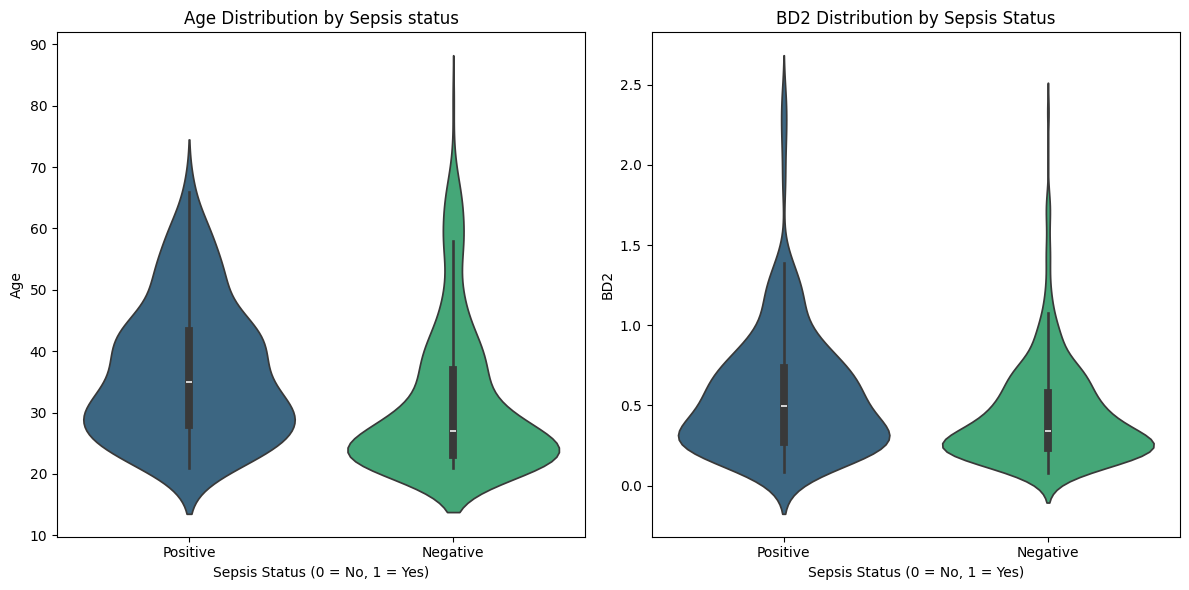

In [20]:
# Violin plot for Age and BD2 distribution by Sepsis_Status
plt.figure(figsize=(12, 6))

# Plot for Age
plt.subplot(1, 2, 1)
sns.violinplot(x='Sepssis', y='Age', data=df_train, palette='viridis')
plt.title('Age Distribution by Sepsis status')
plt.xlabel('Sepsis Status (0 = No, 1 = Yes)')
plt.ylabel('Age')

# Plot for BD2
plt.subplot(1, 2, 2)
sns.violinplot(x='Sepssis', y='BD2', data=df_train, palette='viridis')
plt.title('BD2 Distribution by Sepsis Status')
plt.xlabel('Sepsis Status (0 = No, 1 = Yes)')
plt.ylabel('BD2')

plt.tight_layout()
plt.show()


### 5.  Do levels of Blood Work Result-2 (SK) show a significant difference between sepsis and non-sepsis patients?


### Hypothesis Testing

In [21]:
# Define categories for blood pressure (PR)
def categorize_bp(PR):
    if PR < 60:
        return 'Low BP'
    elif 60 <= PR <= 80:
        return 'Normal BP'
    else:
        return 'High BP'

# Apply the categorization
df_train_converted['BP Category'] = df_train_converted['PR'].apply(categorize_bp)

# Create the contingency table
contingency_table = pd.crosstab(df_train_converted['BP Category'],df_train_converted['Sepssis'])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the test results
print("\nChi-square Test Results")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpretation of the p-value
alpha = 0.05  # Significance level
if p < alpha:
    print("\nReject the null hypothesis (H₀).")
    print("Blood pressure is significantly associated with the prediction of sepsis.")
else:
    print("\nFail to reject the null hypothesis (H₀).")
    print("Blood pressure is not significantly associated with the prediction of sepsis.")


Contingency Table:
Sepssis        0    1
BP Category          
High BP       64   59
Low BP        68   24
Normal BP    259  125

Chi-square Test Results
Chi-square statistic: 13.344485713454322
P-value: 0.0012655571022325755
Degrees of freedom: 2
Expected frequencies:
[[ 80.28881469  42.71118531]
 [ 60.05342237  31.94657763]
 [250.65776294 133.34223706]]

Reject the null hypothesis (H₀).
Blood pressure is significantly associated with the prediction of sepsis.


### Chi-square Test Results

Interpretation of the P-value
Significance level (alpha): 0.05
Since the p-value (0.00127) is less than the significance level (0.05), we reject the null hypothesis (H₀). This indicates that blood pressure is significantly associated with the prediction of sepsis.

Conclusion
Blood pressure (PR) is significantly associated with the prediction of sepsis in patients.
Changes in blood pressure can provide useful information for predicting the onset of sepsis. 

### Data Preparation

#### **Split Data into Train and Test**

- X = Input data
- y = Label

In [22]:
X = df_train.drop('Sepssis', axis=1)
y = df_train['Sepssis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [24]:
# Initialize a LabelEncoder to encode the target variable
label_encoder = LabelEncoder()
y_train_encoder = label_encoder.fit_transform(y_train)
y_test_encoder = label_encoder.transform(y_test)

In [25]:
input_variables = X.columns
input_variables

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

### Create a preprocessor

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), input_variables),
        ('scaler', RobustScaler(), input_variables),
        ('log_transformations', FunctionTransformer(np.log1p), input_variables)
    ]
)

## `Modeling`

In [27]:
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('KNC', KNeighborsClassifier(n_neighbors=5)),
    ('Random_Forest', RandomForestClassifier(random_state=42))
]

### Train on Unbalanced dataset

In [28]:
metrics = []

# Iterate over each tuple to train the model, make predictions on the test set, and compute evaluation metrics
for model_name, model in models:
    pipeline = Pipeline(
        steps=[
            ('preprocesor',preprocessor),
            ('model',model)
        ]
    )
    
    pipeline.fit(X_train, y_train_encoder)
    y_pred = pipeline.predict(X_test)

    # Metrics such as accuracy, F1 score, ROC AUC score, precision, and recall are calculated for each model
    acc = accuracy_score(y_test_encoder, y_pred)
    f1 = f1_score(y_test_encoder, y_pred)
    roc = roc_auc_score(y_test_encoder, y_pred)
    pr = precision_score(y_test_encoder, y_pred)
    rc = recall_score(y_test_encoder, y_pred)

    metrics.append({'Model': model.__class__.__name__,
                    'Accuracy Score': acc,
                    'F1 Score': f1,
                    'ROC AUC Score': roc,
                    'Precision Score': pr,
                    'Recall Score': rc})

# Create a pandas DataFrame from the metrics and sort it based on the F1 score in descending order
overall = pd.DataFrame(metrics)
overall = overall.sort_values(by='F1 Score', ascending=False)
overall_styled = overall.style.background_gradient(cmap='winter')
overall_styled

  File "c:\Users\Orbal\OneDrive - Azubi Africa\Desktop\Github\ML-API-DEPLOYMENT-WITH-FASTAPI\virtual_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,Model,Accuracy Score,F1 Score,ROC AUC Score,Precision Score,Recall Score
1,LogisticRegression,0.760000,0.632653,0.721546,0.673913,0.596154
3,RandomForestClassifier,0.740000,0.589474,0.692700,0.651163,0.538462
2,KNeighborsClassifier,0.693333,0.540000,0.652473,0.562500,0.519231
0,DecisionTreeClassifier,0.686667,0.483516,0.624804,0.564103,0.423077


### Train On Balanced Dataset

In [29]:

# Initialize a dictionary to store all pipelines
all_balanced_pipelines = {}

# Define a table to hold all the metrics
balanced_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score', 'conf_matrix'])

# Loop through the models
for model_name, model in models:
    # Build final pipeline with preprocessor estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote-sampler', SMOTE(random_state=42)),
        ('estimator', model)
    ])

    # Fit training data to final pipeline
    balanced_pipeline.fit(X_train, y_train_encoder)

    # Add models to all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Make prediction
    y_predict = balanced_pipeline.predict(X_test)
    y_proba = balanced_pipeline.predict_proba(X_test)[:, 1]  # Probability of the positive class

    # Generate Classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoder, y_predict, output_dict=True)
        
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test_encoder, y_predict)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_test_encoder, y_proba)

    # Add important metrics to metrics_table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, roc_auc, conf_matrix]

# Display metrics_table
balanced_metrics_table = balanced_metrics_table.sort_values(by="accuracy", ascending=False)
balanced_metrics_table_styled = balanced_metrics_table.style.background_gradient(cmap='winter')
balanced_metrics_table_styled

,model_name,accuracy,precision,recall,f1_score,roc_auc_score,conf_matrix
1,Logistic_Regression,0.753333,0.770312,0.753333,0.757797,0.814560,[[74 24] [13 39]]
3,Random_Forest,0.746667,0.751844,0.746667,0.748719,0.797586,[[77 21] [17 35]]
0,Decision_Tree,0.680000,0.689490,0.680000,0.683675,0.660322,[[71 27] [21 31]]
2,KNC,0.640000,0.679459,0.640000,0.648578,0.726943,[[61 37] [17 35]]


### Hyperparameter Tuning

In [30]:


# Define the models
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Define parameter grid for the three models
params_grid = {
    'rfc': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': ['sqrt', 'log2', None],
        'model__bootstrap': [True, False]
    },
    'knc': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

# Initialize dictionary to store best params and best model
best_models = {}
best_params = {}



# Perform grid search for each model
for model_name, params in params_grid.items():
    if model_name == "rfc":
        model = rfc
    else:
        model = knc

    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler', SMOTE(random_state=42)),
        ('model', model)
    ])

    grid_cv = GridSearchCV(estimator=balanced_pipeline, param_grid=params, scoring='f1', n_jobs=-1, verbose=2)
    grid_cv.fit(X_train, y_train)

    # Get best params and best model
    best_params[model_name] = grid_cv.best_params_
    best_models[model_name] = grid_cv.best_estimator_

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"The best parameters for {model_name}: {params}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best parameters for rfc: {'model__bootstrap': True, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
The best parameters for knc: {'model__algorithm': 'auto', 'model__n_neighbors': 3, 'model__weights': 'uniform'}


In [31]:
best_models

{'rfc': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('imputer',
                                                   SimpleImputer(strategy='median'),
                                                   Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                  ('scaler', RobustScaler(),
                                                   Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                  ('log_transformations',
                                                   FunctionTransformer(func=<ufunc 'log1p'>),
                                                   Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                 ('smote_sampler', SMOTE(random_state=42)),
                 ('model', RandomForestClassifier(n_jobs=-1, random_state=42))

#### Persist Model

In [32]:
# Grab the Random Forest pipeline
forest_pipeline = best_models["rfc"]

# Grab the K Nearest Neighbours pipeline
knc_pipeline = best_models["knc"]

# Grab the encoder
encoder = LabelEncoder()

In [33]:
with open("forest_pipeline.joblib","wb") as file:
    joblib.dump(forest_pipeline, file)

In [34]:
with open("knc_pipeline.joblib","wb") as file:
    joblib.dump(knc_pipeline, file)

In [35]:
with open("encoder.joblib","wb") as file:
    joblib.dump(encoder, file)